In [3]:
import sys
sys.path.append('../')

In [4]:
import matplotlib.pyplot as plt
from neuro_models.neuro_ode_models import Iz_Simple
from neuro_models.utils import plot_voltage

In [5]:
param1 = {
    "Vth": 30,
    "a": 0.02,
    "b": -0.1,
    "c": -55,
    "d": 6
}

param2 = {
    "Vth": 30,
    "a": 0.1,
    "b": 0.26,
    "c": -60,
    "d": -1
}

iz_simple1 = Iz_Simple(param1)
iz_simple2 = Iz_Simple(param2)

In [6]:
V0 = -70
n0 = 0
t0 = 0.0
tn = 2.0
dt = 0.01

In [7]:
# Run the Euler method for Ix < I_x*
iz_simple1.set_Ix(266)
t_case1, V_case1 = iz_simple1.euler_method_spiking(V0=V0, n0=n0, t0=t0, tn=tn, dt=dt, Vth=30)

# Run the Euler method for Ix > I_x*
iz_simple2.set_Ix(12)
t_above, V_above = iz_simple2.euler_method_spiking(V0=V0, n0=n0, t0=t0, tn=tn, dt=dt, Vth=30)

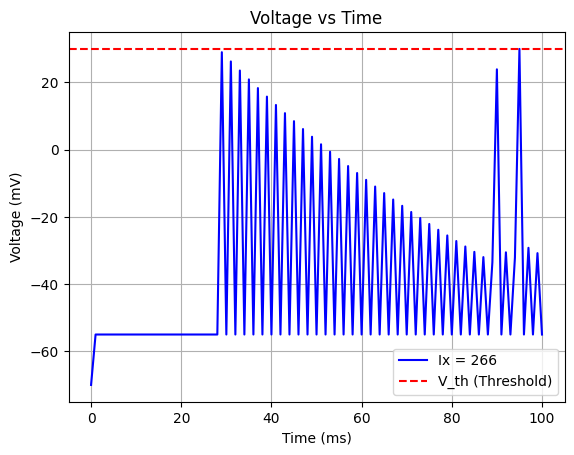

In [8]:
plot_voltage(t_case1, V_values=V_case1[0,:], Ix=266, yth=30, yr=None)

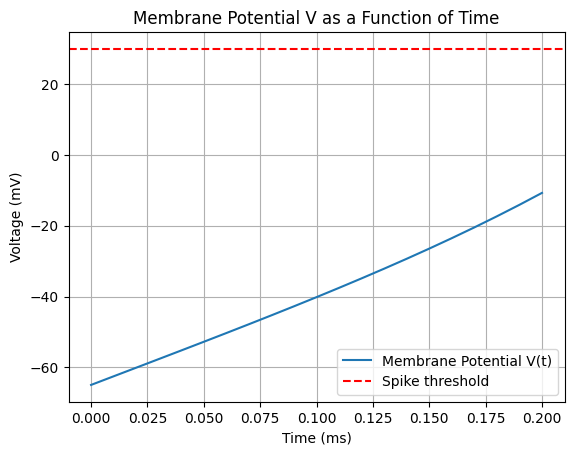

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.02
b = -0.1
c = -55
d = 6
Ix = 266  # Input current
T = 0.2   # Total time duration
dt = 0.01 # Time step
t_values = np.arange(0, T + dt, dt)  # Time points

# Initialize variables
V = -65  # Stable fixed point for membrane potential (initial value)
n = b * V  # Initial value for the recovery variable
V_values = []  # Store membrane potential values over time

# Forward Euler Method Loop
for t in t_values:
    # Store the current V value
    V_values.append(V)
    
    # Calculate dV/dt and dn/dt
    dVdt = 0.04 * V**2 + 5 * V - n + 140 + Ix
    dndt = a * (b * V - n)
    
    # Update V and n using Euler's method
    V += dVdt * dt
    n += dndt * dt
    
    # Spike and reset rule
    if V >= 30:  # If spike occurs
        V = c    # Reset membrane potential
        n += d   # Reset recovery variable

# Plotting the results
plt.plot(t_values, V_values, label="Membrane Potential V(t)")
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Membrane Potential V as a Function of Time')
plt.axhline(30, color='r', linestyle='--', label="Spike threshold")
plt.legend()
plt.grid(True)
plt.show()
